In [1]:
import os
os.getcwd()
os.chdir("G:/OneDrive/casa0010dissertation/00_06 jaipur code_mgwr")

In [2]:
import geopandas as gpd
import pandas as pd


In [3]:

vector_data = gpd.read_parquet("data/cleaned/pca/jaipur_hex_vectors.parquet")
raster_data = gpd.read_parquet("data/cleaned/pca/jaipur_hex_rasters.parquet")

print("Vector data columns:", list(vector_data.columns))
print("Raster data columns:", list(raster_data.columns))



Vector data columns: ['hex_id', 'geometry', 'cover', 'transport_station_point', 'transport_station_polygon', 'motorable_road_nexwork', 'amenities_poi', 'office_poi', 'shop_poi']
Raster data columns: ['hex_id', 'area_clip', 'cover', 'geometry', 'pop_sum', 'builtup_sum', 'ndvi_mean', 'ntl_mean', 'pop_density_km2', 'builtup_density']


In [4]:
# merge data, key is hex_id
# decide which geometry to keep
final_data = vector_data.merge(
    raster_data.drop(columns=['geometry', 'cover']),
    on='hex_id',
    how='left'
)

print(f"\nFinal merged dataset:")
print(f"  Shape: {final_data.shape}")
print(f"  Columns: {list(final_data.columns)}")

# merge geometry from vector data
print(f"\nMerge validation:")
print(f"  Vector hexes: {len(vector_data)}")
print(f"  Raster hexes: {len(raster_data)}")
print(f"  Final hexes: {len(final_data)}")
print(f"  Missing values check: {final_data.isnull().sum().sum()}")


Final merged dataset:
  Shape: (1799, 16)
  Columns: ['hex_id', 'geometry', 'cover', 'transport_station_point', 'transport_station_polygon', 'motorable_road_nexwork', 'amenities_poi', 'office_poi', 'shop_poi', 'area_clip', 'pop_sum', 'builtup_sum', 'ndvi_mean', 'ntl_mean', 'pop_density_km2', 'builtup_density']

Merge validation:
  Vector hexes: 1799
  Raster hexes: 1799
  Final hexes: 1799
  Missing values check: 0


In [5]:
final_output = "data/cleaned/pca/jaipur_hex_complete.parquet"
final_data.to_parquet(final_output, index=False)

In [6]:
final_data.describe()

,hex_id,cover,transport_station_point,transport_station_polygon,motorable_road_nexwork,amenities_poi,office_poi,shop_poi,area_clip,pop_sum,builtup_sum,ndvi_mean,ntl_mean,pop_density_km2,builtup_density
count,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000,1799.000000
mean,1484.344080,0.982600,1.143333,0.007883,32795.421135,5.389677,0.275429,1.686785,212739.245420,1687.619662,58791.878112,0.305591,24.985778,7831.516479,0.274002
std,695.041486,0.070600,3.920743,0.071651,19925.786412,12.460756,1.721571,10.099498,15285.448537,2285.142491,39417.180404,0.083636,12.000231,10543.329464,0.181587
min,23.000000,0.509526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110315.598495,0.000000,0.000000,0.071878,1.982470,0.000000,0.000000
25%,938.500000,1.000000,0.000000,0.000000,16077.744276,0.000000,0.000000,0.000000,216506.350946,306.405941,22125.738869,0.242083,15.047525,1457.915917,0.106458
50%,1456.000000,1.000000,0.000000,0.000000,35108.557152,0.000000,0.000000,0.000000,216506.350946,954.198131,61299.469804,0.289208,25.772130,4491.935024,0.286667
75%,2069.500000,1.000000,0.000000,0.000000,50047.529146,4.618802,0.000000,0.000000,216506.350946,2130.758175,93420.828887,0.357407,33.910071,9847.504207,0.432198
max,2886.000000,1.000000,46.188022,1.000000,79229.462139,152.420471,36.950417,263.271723,216506.350946,20418.297154,156911.072665,0.579837,71.357017,94308.074868,0.724741


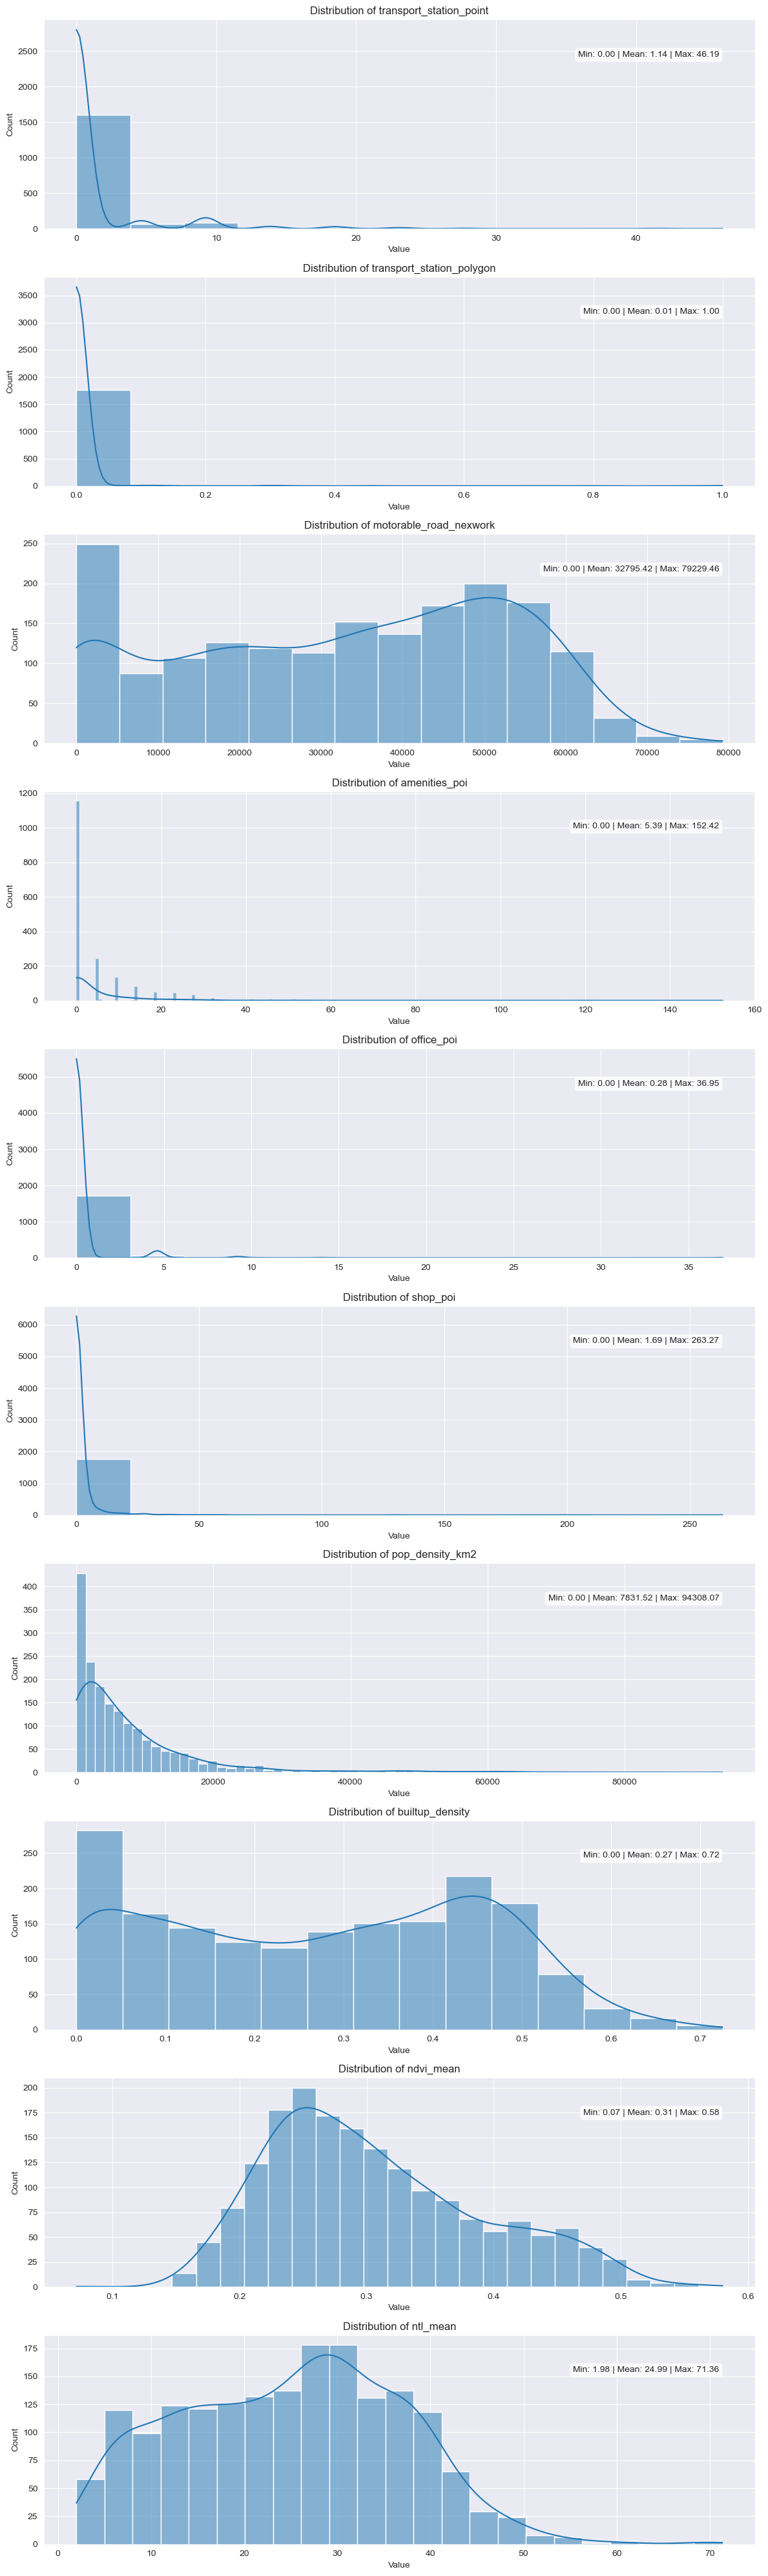

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Columns to plot
columns_to_plot = [
    'transport_station_point', 'transport_station_polygon',
    'motorable_road_nexwork', 'amenities_poi', 'office_poi', 'shop_poi',
    'pop_density_km2', 'builtup_density', 'ndvi_mean', 'ntl_mean'
]

# Filter to include only columns that exist in the dataframe
available_cols = [col for col in columns_to_plot if col in final_data.columns]

# Create a figure with subplots
fig, axes = plt.subplots(len(available_cols), 1, figsize=(12, 4*len(available_cols)))

# Create histograms for each column
for i, col in enumerate(available_cols):
    # Check if there's data to plot
    if final_data[col].sum() == 0:
        axes[i].text(0.5, 0.5, f"No data for {col} (all zeros)",
                    ha='center', va='center', fontsize=12)
    else:
        # Plot histogram with KDE
        sns.histplot(final_data[col].dropna(), ax=axes[i], kde=True)

        # Add basic statistics as text including min value
        stats = f"Min: {final_data[col].min():.2f} | Mean: {final_data[col].mean():.2f} | Max: {final_data[col].max():.2f}"
        axes[i].text(0.95, 0.85, stats,
                    transform=axes[i].transAxes,
                    ha='right', va='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    # Set title and labels
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.savefig("image/process/jaipur_hex_distributions.png")
plt.show()

In [8]:
final_data.to_file("data/cleaned/pca/jaipur_hex_complete.geojson", driver='GeoJSON')

In [9]:
test=gpd.read_file("data/cleaned/pca/jaipur_hex_complete.geojson")
print(test.crs)

EPSG:32643
